In [123]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score
from matplotlib.ticker import FormatStrFormatter
import matplotlib as mpl
sns.set_style("whitegrid")
mpl.rcParams['lines.markersize'] = 12

In [89]:
def load_patient(df, rid, last_tp):
    rids = df.RID.unique()
    patient = df.loc[df.RID == rid]
    return patient

In [107]:
def plot_patient_feature(patient, feature, fig, ax, tp):
    patient = patient.replace(r'^\s+$', np.nan, regex=True)
    patient = patient.dropna(subset=[feature])
    
    sns.lineplot(y=feature, x="M", alpha=.5, palette="muted",
        data=patient[patient.M <= tp], ax=ax, label=feature, marker='o')
    sns.lineplot(y=feature, x="M", alpha=.5, palette="muted",
        data=patient[patient.M >= tp], ax=ax, label=feature, marker='o', linestyle="--")
    ax.get_legend().remove()
    lgd = ax.legend(labels=[feature],loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.15))
    ax.set_xlabel('')
    return lgd

In [37]:
mapping = {
    1: 0,
    7: 0,
    9: 0,
    2: 1,
    4: 1,
    8: 1,
    3: 2,
    5: 2,
    6: 2
}

In [38]:
file = "data/TADPOLE_D1_D2.csv"

df = pd.read_csv(file)
df.replace({"DXCHANGE":mapping}, inplace=True)

/home/moyde/Documents/Studies/Chalmers/Thesis/LIPTraAD/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (471,473,474,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,569,570,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,599,601,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,624,625,626,627,628,629,630,631,632,633,634,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,71

In [128]:
rid = 4015
tp = 24
patient = load_patient(df,rid,tp)
patient = patient.dropna(subset=["DX"])
patient

,RID,PTID,VISCODE,SITE,D1,D2,COLPROT,ORIGPROT,EXAMDATE,DX_bl,...,PHASE_UPENNBIOMK9_04_19_17,BATCH_UPENNBIOMK9_04_19_17,KIT_UPENNBIOMK9_04_19_17,STDS_UPENNBIOMK9_04_19_17,RUNDATE_UPENNBIOMK9_04_19_17,ABETA_UPENNBIOMK9_04_19_17,TAU_UPENNBIOMK9_04_19_17,PTAU_UPENNBIOMK9_04_19_17,COMMENT_UPENNBIOMK9_04_19_17,update_stamp_UPENNBIOMK9_04_19_17
9442,4015,037_S_4015,bl,37,1,1,ADNI2,ADNI2,2011-04-13,LMCI,...,ADNI2,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-08,384.6,420.7,39.81,NaN,2017-04-20 14:39:55.0
9444,4015,037_S_4015,m06,37,1,1,ADNI2,ADNI2,2011-11-16,LMCI,...,,,,,,,,,,
9445,4015,037_S_4015,m12,37,1,1,ADNI2,ADNI2,2012-04-11,LMCI,...,,,,,,,,,,
9447,4015,037_S_4015,m24,37,1,1,ADNI2,ADNI2,2013-04-19,LMCI,...,ADNI2,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-08,436.3,430.9,36.95,NaN,2017-04-20 14:39:55.0
11222,4015,037_S_4015,m36,37,1,1,ADNI2,ADNI2,2014-05-28,LMCI,...,,,,,,,,,,
11849,4015,037_S_4015,m48,37,1,1,ADNI2,ADNI2,2015-04-08,LMCI,...,ADNI2,UPENNBIOMK9,P06-MP02-MP01,P06-MP02-MP01/2,2016-12-08,318.6,406.7,35.05,NaN,2017-04-20 14:39:55.0
12479,4015,037_S_4015,m60,37,1,1,ADNI2,ADNI2,2016-04-11,LMCI,...,,,,,,,,,,


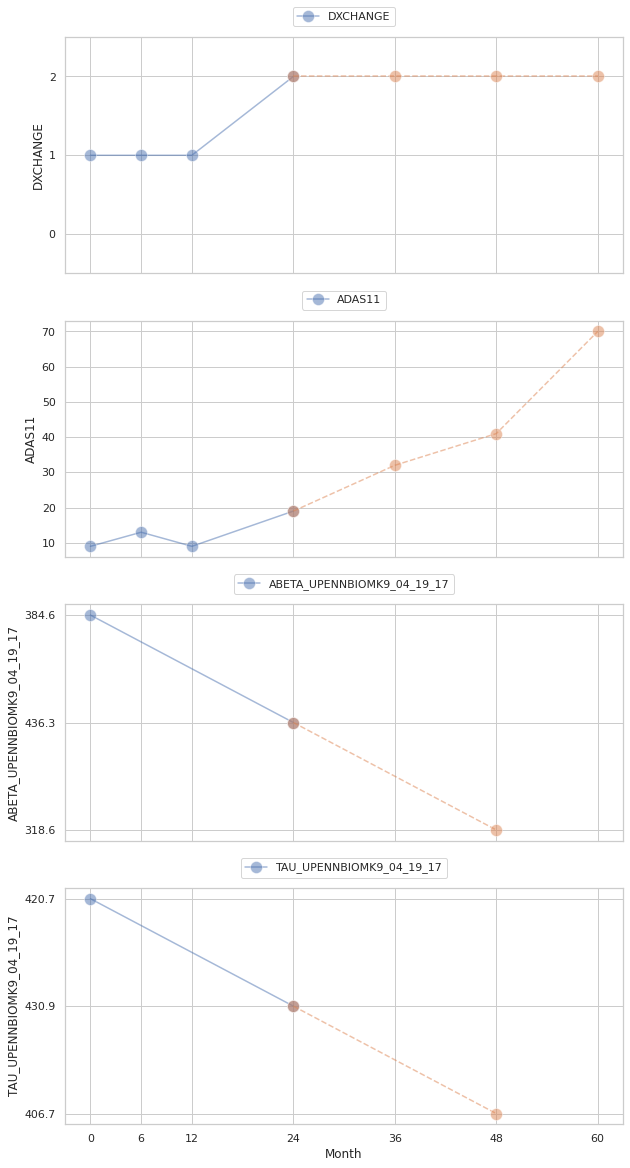

In [129]:
fig, (ax_dx, ax_adas, ax_abeta, ax) = plt.subplots(4,1, figsize=(10,20), sharex=True)

ax_dx.tick_params(axis="x", which="minor", direction="out", reset=True, grid_color='r', grid_alpha=0.5)

plt.setp(ax_dx, yticks=[0,1,2])
plt.xticks(np.arange(min(patient.M), max(patient.M)+1, 6.0))
ax_dx.set_ylim([-0.5, 2.5])
plot_patient_feature(patient, "DXCHANGE",fig, ax_dx, tp)
plot_patient_feature(patient, "ABETA_UPENNBIOMK9_04_19_17",fig, ax_abeta, tp)
plot_patient_feature(patient, "ADAS11", fig, ax_adas, tp)
plot_patient_feature(patient, "TAU_UPENNBIOMK9_04_19_17", fig, ax, tp)

plt.setp(ax_dx, xticks=patient["M"])
plt.setp(ax_abeta, xticks=patient["M"])
plt.setp(ax_adas, xticks=patient["M"])
plt.xlabel("Month")
ax_adas.autoscale()
ax_mmse.autoscale()
ax.autoscale()



plt.savefig("figures/prototypes/prototype_{}_progression.png".format(rid),bbox_inches="tight", dpi=300)
